# **Jour 44 : USArrests**

Le jeu de données **USArrests** est un ensemble de statistiques classiques qui fournit des informations sur la criminalité et le nombre d'arrestations dans chacun des **50** États américains en **1973** pour 100K habitants.

$\bigoplus$ **Signification des variables**

+  Murder :	Taux d'homicides volontaires (meurtres)	
+  Assault :	Taux d'agressions physiques (violentes)	
+  UrbanPop :	Pourcentage de la population vivant en zone urbaine
+  Rape :	Taux de viols déclarés	

## 0. Chargement des librairies 

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import plotly.express as px
import statsmodels.api as sm


from sklearn.model_selection import train_test_split, cross_val_score




## 1. Chargement de la base de données

In [3]:
data = pd.read_csv("../data/USArrests.csv")

data.columns.values[0]= 'Etats'

In [4]:
data.head()

,Etats,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## 2. Vérification des valeurs manquantes et quelques statistiques 

### 2.1. Les valeurs manquantes 


In [6]:
print(data.isnull().sum())

Etats       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


Aucune valeur manquante ne se trouve dans la base.

### 2.2. Statistiques descriptives

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


Avec la variable **UrbanPop** par exemple, si on devrait avoir la même proportion de population vivant en zone urbaine dans chaque Etat, alors ça serait **65,54%** et les valeurs de notre échantillons s'écartent de **14,47 unités** par raport à cette dernière.

### 3. Exploration visuelle 

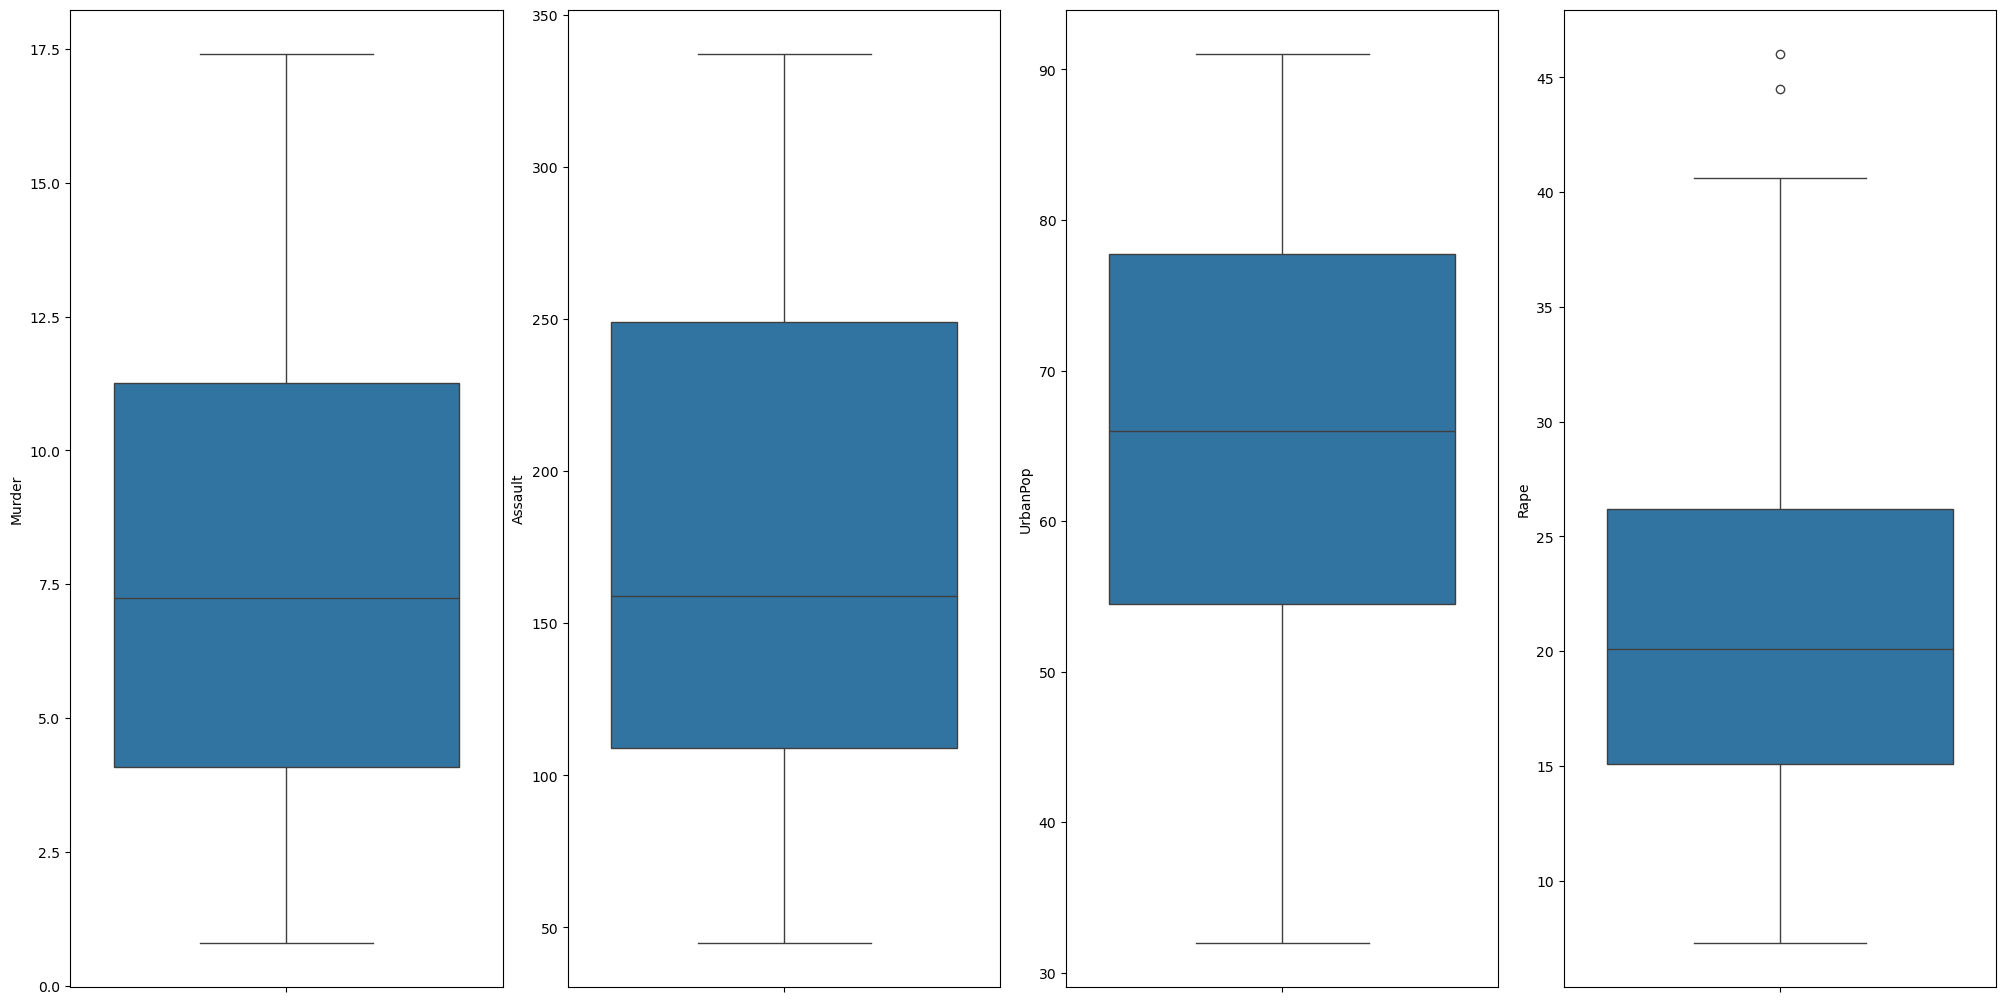

In [ ]:
# Nous allons exclure la colonne des noms des Etats pour les analyses
df = data.select_dtypes(include=[np.number])
# Création de boxplots
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


Ici nous observons sur ces boxplots juste 2 valeures aberrantes sur la variable **Rape**. Cela ne devrait pas poser de problème pour la suite de notre analyse.

Text(0.5, 1.0, 'Meurtres vs Population Urbaine')

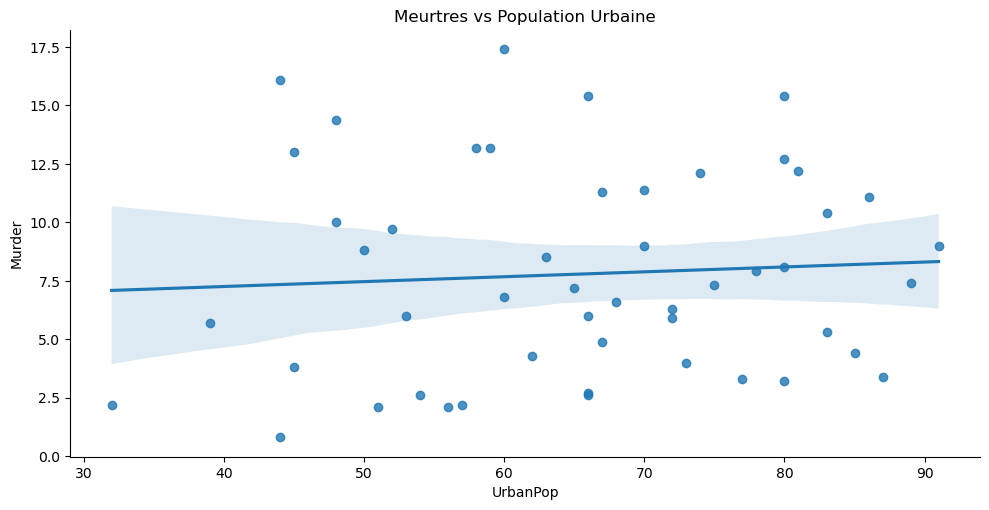

In [30]:
sns.lmplot(data=df, x='UrbanPop', y='Murder', height=5, aspect=2)
plt.title("Meurtres vs Population Urbaine")

Ici on peut simplement rémarquer qu'il n'y a pas une relation particulière entre la proportion de la population vivant en zone urbaine et les meutres dans un quelconque Etat.

In [11]:
# Nuage de points 3D (Murder vs Assault vs Rape)
fig = px.scatter_3d(data, x='Murder', y='Assault', z='Rape', color='UrbanPop', 
                    hover_name=data.index, title="3D Crime Analysis")
fig.show()

## 4. Modélisation 

### 4.1. Préparation des données

In [42]:
def train(model, X, y):
    # Entraînement du modèle
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(X_train, y_train)
    
    # Prédiction sur les données d'entraînement
    pred = model.predict(X_test)
    
    # Validation croisée du modèle
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Rapport du modèle")
    print("RMSE :",np.sqrt(mean_squared_error(y_test, pred)))
    print("R2 :", r2_score(y_test, pred))
    print('CV Score :', cv_score)


### 4.2. Régression linéaire 

Rapport du modèle
RMSE : 2.0008165244475156
R2 : 0.7659305284774959
CV Score : 7.11369377843057


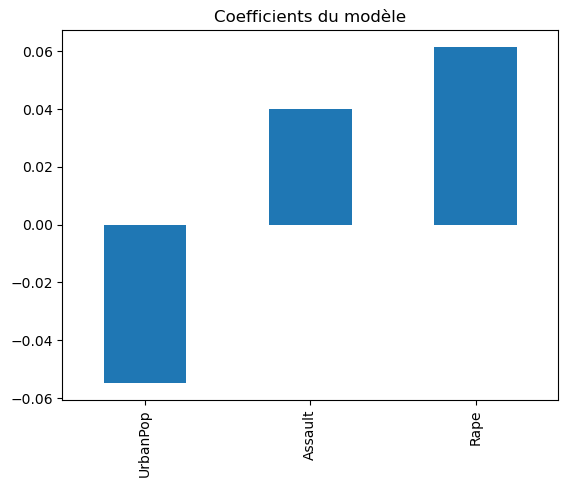

In [46]:

model = LinearRegression()
model.fit(X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Coefficients du modèle')

print("Rapport du modèle")
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 :", r2_score(y_test, y_pred))
print('CV Score :', cv_score)


## 4. Prédiction

Que prévoir pour un état avec Assault = 150, UrbanPop = 70 et Rape = 20 ?

In [28]:
new_data = pd.DataFrame({'Assault': [150], 'UrbanPop': [70], 'Rape': [20]})
predicted_murder = model.predict(new_data)[0]
print(f"Taux de meurtre prévu: {predicted_murder:.2f}")

Taux de meurtre prévu: 6.53


R² = 0.766 alors le modèle explique 76.6% de la variance du taux de meurtres et une RMSE = 2.00 indique que l'erreur moyenne des prédictions est de 2 meurtres pour 100k habitants.

Pour Assault = 150, UrbanPop = 70%, Rape = 20, le modèle prédit 6.53 meurtres/100k hab. Cela correspond à un État moins violent que la moyenne (ex. proche du New Hampshire dans les données réelles).